# Trabalho Fuzz

## Import Libs

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=5ed0369cfe5f3a0725b3c4ca359389e45e89a681b7bd4a456d6d2338c8269b84
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Get infos

In [ ]:
data = pd.read_csv('historicoGravidadeLabel.txt', sep='|', header=0)

In [ ]:
data

,index,Sist,Diast,qPa,pulse,resp,gravity,label
0,1,8.5806,2.2791,-8.4577,56.8384,9.2229,33.5156,'instavel'
1,2,12.3279,3.4478,-8.6134,146.6000,14.6048,68.3047,'potEstavel'
2,3,16.6333,12.5384,8.7333,114.0737,4.2997,30.3124,'instavel'
3,4,20.6784,11.7365,8.6493,124.7851,3.8199,24.0960,'critico'
4,5,19.0901,10.4986,8.6096,51.3438,21.0420,30.8344,'instavel'
...,...,...,...,...,...,...,...,...
795,796,13.9159,1.5673,-8.4813,185.5561,8.8162,13.3046,'critico'
796,797,13.1121,8.9381,4.8693,198.0136,10.8730,34.2401,'instavel'
797,798,19.6008,7.1716,4.7972,184.0678,8.9774,24.3470,'critico'
798,799,12.8400,12.2444,8.2539,86.2256,18.9484,53.4373,'potEstavel'


## Normalize and create the antecent & consequent

In [ ]:
q = np.linspace(data['qPa'].min(),data['qPa'].max(), len(data))
p = np.linspace(data['pulse'].min(),data['pulse'].max(), len(data))
r = np.linspace(data['resp'].min(),data['resp'].max(), len(data))
g = np.linspace(data['gravity'].min(),data['gravity'].max(), len(data))

In [ ]:
qPa = ctrl.Antecedent(q, 'qPa')
pulse = ctrl.Antecedent(p, 'pulse')
resp = ctrl.Antecedent(r, 'resp')

In [ ]:
gravity = ctrl.Consequent(g, 'gravity')

## Create MembershipFunction

In [ ]:
qPa.automf(names=["poor", "good","high"])
# = fz.gaussmf(resp.universe, -9, 9)
#qPa['average'] = fz.gaussmf(resp.universe,-1,9)
'''
pulse['poor'] = fz.trimf(pulse.universe, [0, 0, 70])
pulse['good'] = fz.trimf(pulse.universe, [40, 70, 100])
pulse['high'] = fz.trimf(pulse.universe, [70, 200, 200])'''
pulse.automf(names=["poor", "good","high"])

'''
resp['poor'] = fz.trimf(resp.universe, [0, 0, 14])
resp['good'] = fz.trimf(resp.universe, [9, 14, 19])
resp['high'] = fz.trimf(resp.universe, [14, 22, 22])
'''
resp.automf(names=["poor", "good","high"])

gravity.automf(names=["critical","unstable", "potentially unstable","stable"])

'''
gravity['critical'] = fz.trimf(gravity.universe, [12, 12, 19])
gravity['unstable'] = fz.trimf(gravity.universe, [12, 19, 38])
gravity['potentially unstable'] = fz.trimf(gravity.universe, [19, 38, 80])
gravity['stable'] = fz.trim'(gravity.universe, [38, 80, 80 ])'''


"\ngravity['critical'] = fz.trimf(gravity.universe, [12, 12, 19])\ngravity['unstable'] = fz.trimf(gravity.universe, [12, 19, 38])\ngravity['potentially unstable'] = fz.trimf(gravity.universe, [19, 38, 80])\ngravity['stable'] = fz.trim'(gravity.universe, [38, 80, 80 ])"

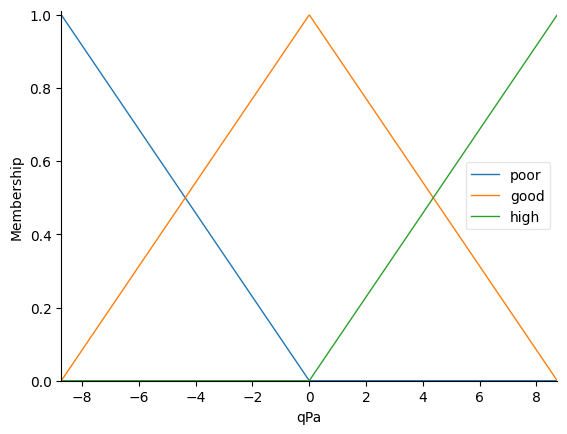

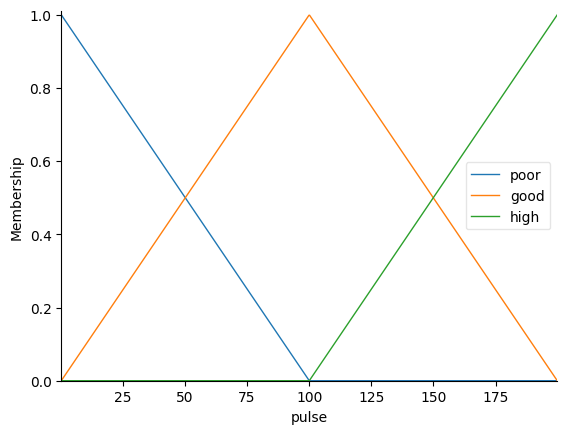

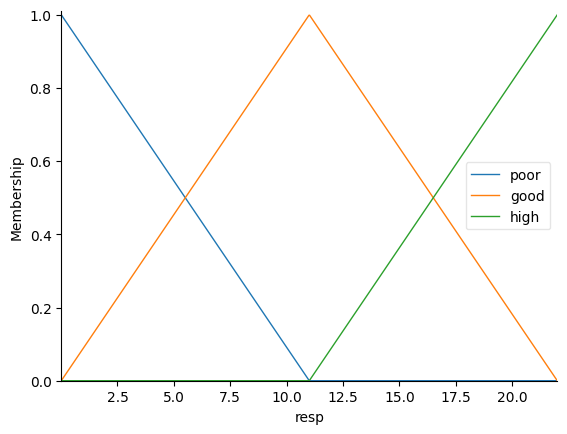

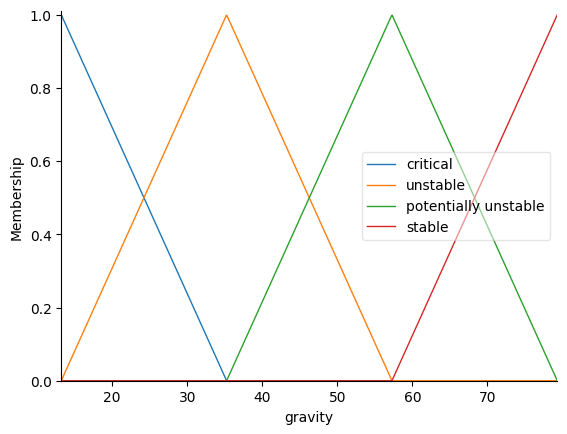

In [ ]:
qPa.view()
pulse.view()
resp.view()
gravity.view()

## Rules From Spec

In [ ]:
rules_ctrl_spec = []

#1
rules_ctrl_spec.append(ctrl.Rule(qPa["poor"]  |  pulse["poor"] | resp["poor"],gravity["critical"]))
#2
rules_ctrl_spec.append(ctrl.Rule(qPa["poor"]  |  pulse["poor"] | resp["high"],gravity["critical"]))
#3
rules_ctrl_spec.append(ctrl.Rule(qPa["poor"]  |  pulse["poor"] | resp["good"],gravity["unstable"]))
#4
rules_ctrl_spec.append(ctrl.Rule(qPa["poor"]  |  pulse["high"] | resp["high"],gravity["critical"]))
#5
rules_ctrl_spec.append(ctrl.Rule(qPa["poor"]  |  pulse["high"] | resp["poor"],gravity["critical"]))
#6
rules_ctrl_spec.append(ctrl.Rule(qPa["poor"]  |  pulse["high"] | resp["good"],gravity["unstable"]))
#7
rules_ctrl_spec.append(ctrl.Rule(qPa["poor"]  |  pulse["good"] | resp["poor"],gravity["unstable"]))
#8
rules_ctrl_spec.append(ctrl.Rule(qPa["poor"]  |  pulse["good"] | resp["high"],gravity["unstable"]))
#9
rules_ctrl_spec.append(ctrl.Rule(qPa["poor"]  |  pulse["good"] | resp["good"],gravity["potentially unstable"]))

#10
rules_ctrl_spec.append(ctrl.Rule(qPa["high"]  |  pulse["poor"] | resp["poor"],gravity["critical"]))
#11
rules_ctrl_spec.append(ctrl.Rule(qPa["high"]  |  pulse["poor"] | resp["high"],gravity["critical"]))
#12
rules_ctrl_spec.append(ctrl.Rule(qPa["high"]  |  pulse["poor"] | resp["good"],gravity["unstable"]))
#13
rules_ctrl_spec.append(ctrl.Rule(qPa["high"]  |  pulse["high"] | resp["poor"],gravity["critical"]))
#14
rules_ctrl_spec.append(ctrl.Rule(qPa["high"]  |  pulse["high"] | resp["good"],gravity["unstable"]))
#15
rules_ctrl_spec.append(ctrl.Rule(qPa["high"]  |  pulse["high"] | resp["high"],gravity["critical"]))
#16
rules_ctrl_spec.append(ctrl.Rule(qPa["high"]  |  pulse["good"] | resp["poor"],gravity["unstable"]))
#17
rules_ctrl_spec.append(ctrl.Rule(qPa["high"]  |  pulse["good"] | resp["high"],gravity["unstable"]))
#18
rules_ctrl_spec.append(ctrl.Rule(qPa["high"]  |  pulse["good"] | resp["good"],gravity["potentially unstable"]))


#10
rules_ctrl_spec.append(ctrl.Rule(qPa["good"]  |  pulse["poor"] | resp["poor"],gravity["unstable"]))
#11
rules_ctrl_spec.append(ctrl.Rule(qPa["good"]  |  pulse["poor"] | resp["high"],gravity["unstable"]))
#12
rules_ctrl_spec.append(ctrl.Rule(qPa["good"]  |  pulse["poor"] | resp["good"],gravity["potentially unstable"]))
#13
rules_ctrl_spec.append(ctrl.Rule(qPa["good"]  |  pulse["high"] | resp["poor"],gravity["unstable"]))
#14
rules_ctrl_spec.append(ctrl.Rule(qPa["good"]  |  pulse["high"] | resp["good"],gravity["potentially unstable"]))
#15
rules_ctrl_spec.append(ctrl.Rule(qPa["good"]  |  pulse["high"] | resp["high"],gravity["unstable"]))
#16
rules_ctrl_spec.append(ctrl.Rule(qPa["good"]  |  pulse["good"] | resp["poor"],gravity["potentially unstable"]))
#17
rules_ctrl_spec.append(ctrl.Rule(qPa["good"]  |  pulse["good"] | resp["high"],gravity["potentially unstable"]))
#18
rules_ctrl_spec.append(ctrl.Rule(qPa["good"]  |  pulse["good"] | resp["good"],gravity["stable"]))


## Rules From Wang Mandel

In [ ]:
rules = []
for _, row in data.iterrows():
  listX1 , listX2, listX3 ,listY = [],[],[],[]
  #qPA
  listX1.append(fz.interp_membership(data['qPa'],
                                      qPa["poor"].mf,
                                      row["qPa"]))
  listX1.append(fz.interp_membership(data['qPa'],
                                      qPa["good"].mf,
                                      row["qPa"]))
  listX1.append(fz.interp_membership(data['qPa'],
                                      qPa["high"].mf,
                                      row["qPa"]))

  #pulse
  listX2.append(fz.interp_membership(data['pulse'],
                                      pulse["poor"].mf,
                                      row["pulse"]))
  listX2.append(fz.interp_membership(data['pulse'],
                                      pulse["good"].mf,
                                      row["pulse"]))
  listX2.append(fz.interp_membership(data['pulse'],
                                      pulse["high"].mf,
                                      row["pulse"]))

  #resp            
  listX3.append(fz.interp_membership(data['resp'],
                                      resp["poor"].mf,
                                      row["resp"]))
  listX3.append(fz.interp_membership(data['resp'],
                                      resp["good"].mf,
                                      row["resp"]))
  listX3.append(fz.interp_membership(data['resp'],
                                      resp["high"].mf,
                                      row["resp"]))
 
  
  #gravity
  listY.append(fz.interp_membership(data['gravity'],
                                      gravity["critical"].mf,
                                      row["gravity"]))
  listY.append(fz.interp_membership(data['gravity'],
                                      gravity["unstable"].mf,
                                      row["gravity"]))
  listY.append(fz.interp_membership(data['gravity'],
                                      gravity["potentially unstable"].mf,
                                      row["gravity"]))
  listY.append(fz.interp_membership(data['gravity'],
                                      gravity["stable"].mf,
                                      row["gravity"]))
  
  x1Max , x2max , x3max, ymax = np.argmax(listX1) , np.argmax(listX2), np.argmax(listX3), np.argmax(listY)
  degree = listX1[x1Max] * listX2[x2max] * listX3[x3max] * listY[ymax]
  rules.append([x1Max,x2max,x3max , ymax , degree])

print('primitive Rules:')
print('we have',len(rules),'rules!','\n')

unique = np.unique(rules, axis=0)
print('unique rule: ')
print(len(unique))

array_rule = {}
for i in unique:
  t = str(i[:-1])
  if t not in array_rule:
    array_rule[t] = i[-1]
  elif array_rule[t] < i[-1]:
    array_rule[t] = i[-1] 

print('finall rules: ')
print(len(array_rule))

primitive Rules:
we have 800 rules! 

unique rule: 
9
finall rules: 
6


In [ ]:
def convertRule(i):
  i = int(i)
  if i == 0 : 
    return "poor" 
  if i == 1: 
    return "high"
  if i == 2:
    return "good" 

def convertRuleG(i):
  i = int(i)
  if i == 0: 
    return "critical"
  if i == 1:
    return "unstable"
  if i == 2:
    return "potentially unstable"
  if i == 3:
    return "stable"

In [ ]:
rules_ctrl = []
for i in array_rule:
  l = [float(x) for x in i[1:-1].split()]
  _qPa = convertRule(l[0])
  _pulse = convertRule(l[1])
  _resp = convertRule(l[2])
  _gravity = convertRuleG(l[3])
  rules_ctrl.append(ctrl.Rule(qPa[_qPa] | pulse[_pulse] | resp[_resp],gravity[_gravity] ))

## Simulation

In [ ]:
def state_gravity(value):
  if value <= 25:
    return "critico"
  if value <= 50:
    return "instavel"
  if value <= 75:
    return "potEstavel"
  if value <= 100:
    return "estavel"
  return "err"

In [ ]:
def simulation(data,sim):
  erro = 0
  rms = 0
  for index, row in data.iterrows():
    sim.input["qPa"] = row["qPa"]
    sim.input["pulse"] = row["pulse"]
    sim.input["resp"] = row["resp"]
    sim.compute()
    fuzzy_result = sim.output["gravity"]
    label = state_gravity(fuzzy_result)
    if label != row["label"].replace("'",""):
        erro += 1
    rms += (fuzzy_result - row["gravity"])**2
  N = len(data)   
  print("Pco: {}".format(100*(N-erro)/N))
  print("erro {}".format(erro))
  print("RMSE: {}".format(math.sqrt(1/N*rms)))

### By Specialist

In [ ]:
sim =  ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules=rules_ctrl_spec))

In [ ]:
sim.input["qPa"] = 8.6096
sim.input["pulse"] = 51.3438
sim.input["resp"] = 21.0420
sim.compute()
sim.output["gravity"]
#8.6096|51.3438|21.0420

44.62273119754357

In [ ]:
simulation(data, sim)

Pco: 54.75
erro 362
RMSE: 17.37287237696085


### By Wang Mandel

In [ ]:
sim_wang =  ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules=rules_ctrl))

In [ ]:
simulation(data, sim_wang)

Pco: 24.0
erro 608
RMSE: 23.128006155362947
